用不同数值方法计算积分$\int_0^1 \sqrt{x}lnxdx=-\frac{4}{9}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    if x == 0:
        return 0
    else:
        return np.sqrt(x)*np.log(x)

# 复合求积公式

In [3]:
n = []
real = []
for i in range(2,83,5):
    n.append(i)
    real.append(-4/9)

## 复合梯形法 

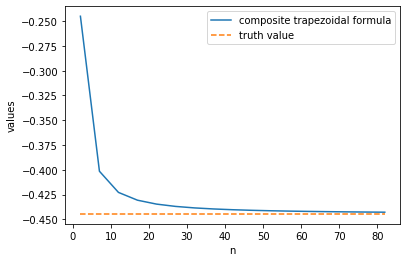

In [4]:
result_list = []
for points in n:
    h = 1 / points
    result = 0
    for k in range(1,points):
        result += h * f(k*h)
    result_list.append(result)
plt.plot(n, result_list)
plt.plot(n, real, linestyle='--')
plt.xlabel('n')
plt.ylabel('values')
plt.legend(['composite trapezoidal formula','truth value'])
plt.show()

误差分析：$R_n(f)=-\frac{1}{12}h^2f''(\eta)$

## 复合辛普森公式 

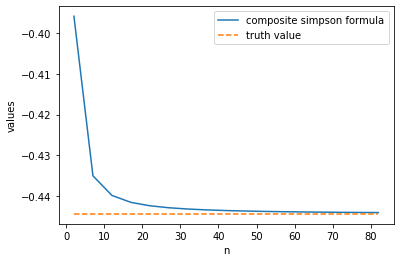

In [5]:
result_list = []
for points in n:
    h = 1 / points
    result = 0
    for k in range(0,points):
        result += 2/3 * h * f(k*h+1/2*h)
    for k in range(1,points):
        result += 1/3 * h * f(k*h)
    result_list.append(result)
plt.plot(n, result_list)
plt.plot(n, real, linestyle='--')
plt.xlabel('n')
plt.ylabel('values')
plt.legend(['composite simpson formula','truth value'])
plt.show()

误差分析：$R_n(f)=-\frac{1}{180}(\frac{h}{2})^4f^{(4)}(\eta)$

**结论：不存在一个最小的h，使得精度不能再被改善**

# 龙贝格求积

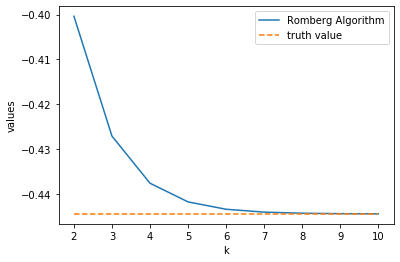

In [6]:
result_list = []
l = [2,3,4,5,6,7,8,9,10]
real = np.zeros(9)
real = real - 4/9
for k in l:
    t_table = np.zeros((k+1,k+1))
    t_table[0][0] = 0
    # 更新第一列
    for i in range(1,k+1):
        tmp = 0
        for j in range(0,2**(i-1)):
            tmp += f((2*j+1)/2**i)
        t_table[0][i] = 1/2*t_table[0][i-1]+1/2**i*tmp
    # 外推加速
    for i in range(1,k+1):
        for j in range(1,k+2-i):
            t_table[i][j-1] = 1/(4**i-1)*(4**i*t_table[i-1][j]-t_table[i-1][j-1])
    result_list.append(t_table[k][0])
plt.plot(l, result_list)
plt.plot(l, real, linestyle='--')
plt.xlabel('k')
plt.ylabel('values')
plt.legend(['Romberg Algorithm','truth value'])
plt.show()

# 自适应辛普森积分

$\epsilon =10^{-4}$

In [7]:
def simpson(a,b):
    c = (a+b)/2
    return (f(a)+4*f(c)+f(b))*(b-a)/6
    
def adsp(a,b,eps,S):
    c = (b+a)/2
    L = simpson(a,c)
    R = simpson(c,b)
    print("The predicting intergation from {} to {} is {}...".format(a,b,L+R))
    if(np.abs(L+R-S) <= 15*eps):
        return L+R+(L+R-S)/15
    return adsp(a,c,eps/2,L)+adsp(c,b,eps/2,R)

result = adsp(0,1,0.0001,simpson(0,1))
print("The final prediction is {}".format(result))

The predicting intergation from 0 to 1 is -0.3957838997945599...
The predicting intergation from 0 to 0.5 is -0.3008220440805715...
The predicting intergation from 0 to 0.25 is -0.16324031982545062...
The predicting intergation from 0 to 0.125 is -0.07782558160156552...
The predicting intergation from 0 to 0.0625 is -0.03462595652207266...
The predicting intergation from 0 to 0.03125 is -0.014756050961632449...
The predicting intergation from 0 to 0.015625 is -0.006105859133245498...
The predicting intergation from 0 to 0.0078125 is -0.002472988027883651...
The predicting intergation from 0 to 0.00390625 is -0.0009854342126539893...
The predicting intergation from 0 to 0.001953125 is -0.00038768371069540573...
The predicting intergation from 0 to 0.0009765625 is -0.0001509545042065364...
The predicting intergation from 0 to 0.00048828125 is -5.828048973816939e-05...
The predicting intergation from 0 to 0.000244140625 is -2.234121647891552e-05...
The predicting intergation from 0 to 0.0